# Candlestick Abandoned Baby

https://www.investopedia.com/terms/b/bullish-abandoned-baby.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'CMCSA'
start = '2018-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,40.860001,41.110001,40.049999,41.070000,38.017441,18270300
2018-01-03,40.750000,41.369999,40.049999,40.410000,37.406498,21062900
2018-01-04,40.470001,40.720001,40.099998,40.669998,37.647171,18143800
2018-01-05,40.910000,41.240002,40.410000,41.040001,37.989670,17007500
2018-01-08,40.770000,41.029999,40.290001,40.480000,37.471294,15189500


## Candlestick with Abandoned Baby

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,40.860001,41.110001,40.049999,41.070000,38.017441,18270300,False
1,736697.0,40.750000,41.369999,40.049999,40.410000,37.406498,21062900,False
2,736698.0,40.470001,40.720001,40.099998,40.669998,37.647171,18143800,False
3,736699.0,40.910000,41.240002,40.410000,41.040001,37.989670,17007500,False
4,736702.0,40.770000,41.029999,40.290001,40.480000,37.471294,15189500,False


Text(0, 0.5, 'Price')

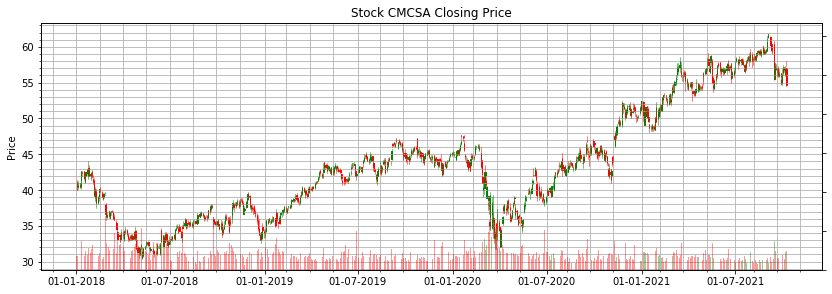

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
abandoned_baby = talib.CDLABANDONEDBABY(df['Open'], df['High'], df['Low'], df['Close'])

abandoned_baby = abandoned_baby[abandoned_baby != 0]

In [6]:
df['abandoned_baby'] = talib.CDLABANDONEDBABY(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['abandoned_baby'] !=0]

,Open,High,Low,Close,Adj Close,Volume,abandoned_baby
Date,,,,,,,
2021-10-08,56.98,56.98,54.57,54.700001,54.700001,24008200,-100


In [8]:
df['Adj Close'].loc[df['abandoned_baby'] !=0]

Date
2021-10-08    54.700001
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['abandoned_baby'] !=0].index

DatetimeIndex(['2021-10-08'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
abandoned_baby

Date
2021-10-08   -100
dtype: int32

In [11]:
abandoned_baby.index

DatetimeIndex(['2021-10-08'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,abandoned_baby
Date,,,,,,,
2018-01-02,40.860001,41.110001,40.049999,41.070000,38.017441,18270300,0
2018-01-03,40.750000,41.369999,40.049999,40.410000,37.406498,21062900,0
2018-01-04,40.470001,40.720001,40.099998,40.669998,37.647171,18143800,0
2018-01-05,40.910000,41.240002,40.410000,41.040001,37.989670,17007500,0
2018-01-08,40.770000,41.029999,40.290001,40.480000,37.471294,15189500,0
...,...,...,...,...,...,...,...
2021-10-04,57.200001,57.200001,56.520000,56.779999,56.529999,14261500,0
2021-10-05,56.330002,57.310001,56.270000,56.790001,56.790001,15620500,0
2021-10-06,56.090000,56.970001,55.910000,56.900002,56.900002,22844900,0


Text(0, 0.5, 'Price')

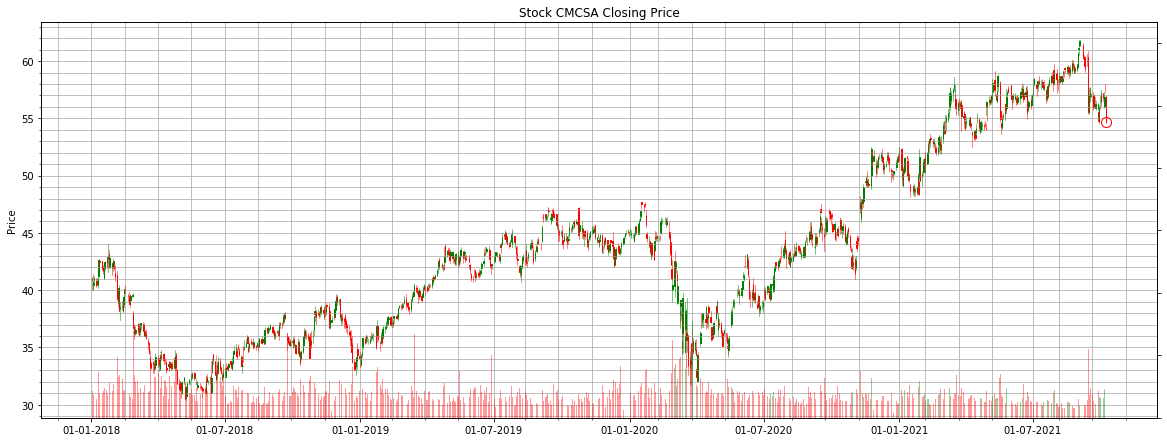

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['abandoned_baby'] !=0].index, df['Adj Close'].loc[df['abandoned_baby'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-09-01':'2021-10-11']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,abandoned_baby,VolumePositive
0,738034.0,61.009998,61.520000,60.560001,61.139999,60.870804,15040100,0,False
1,738035.0,61.369999,61.799999,61.279999,61.750000,61.478119,10223700,0,True
2,738036.0,61.400002,61.799999,61.330002,61.720001,61.448254,8080400,0,True
3,738040.0,61.430000,61.570000,60.200001,60.299999,60.034504,15979000,0,False
4,738041.0,60.160000,60.520000,60.040001,60.139999,59.875206,16750400,0,False


Text(0, 0.5, 'Price')

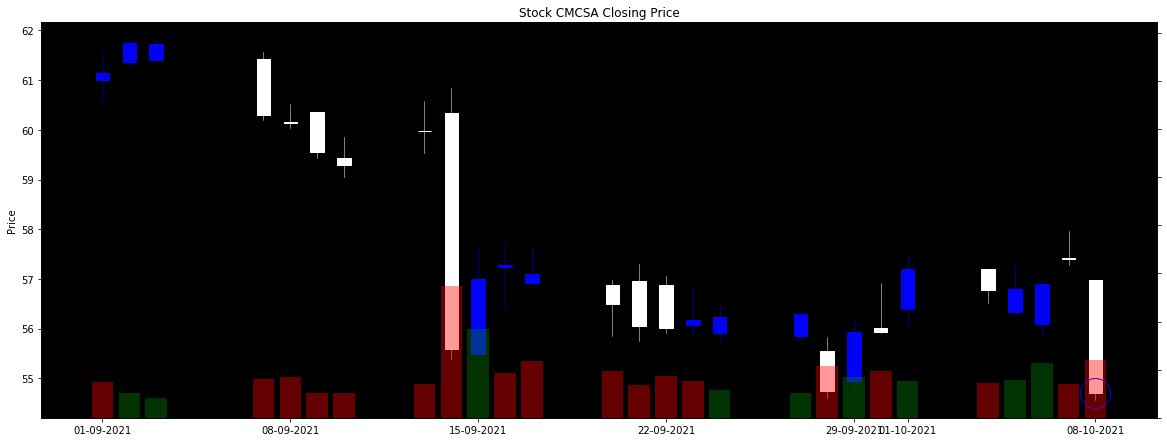

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='b', colordown='w', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['abandoned_baby'] !=0].index, df['Adj Close'].loc[df['abandoned_baby'] !=0],
                'ob', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

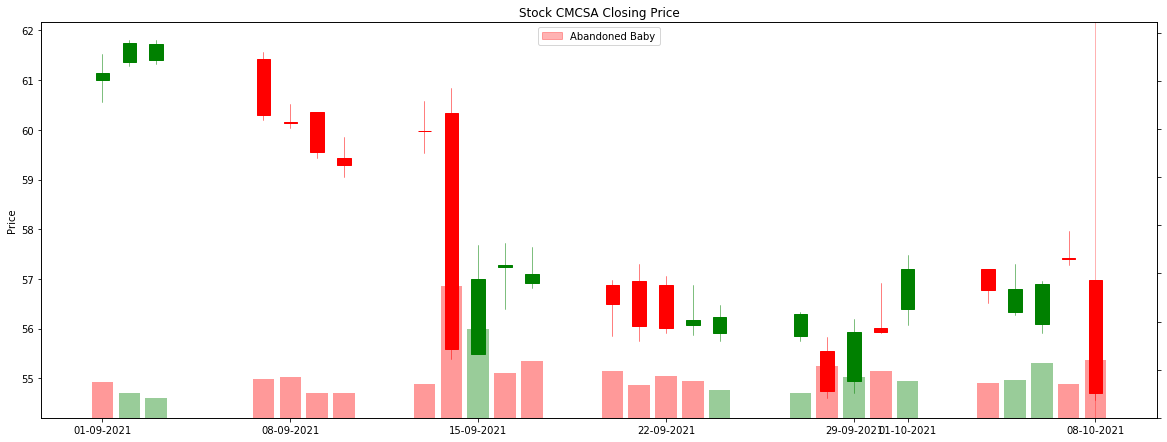

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,10,8)), date2num(datetime(2021,10,8)), 
           label="Abandoned Baby",color="red", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')